In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Additional imports
import statsmodels.api as sm

In [4]:
# few specific functions from statsmodels package to keep our namespace clean
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [5]:
# We will also use some functions from ISLP package
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

The function dir() provides a list of objects in a namespace

In [6]:
dir()

['In',
 'MS',
 'Out',
 'VIF',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'anova_lm',
 'exit',
 'get_ipython',
 'load_data',
 'np',
 'open',
 'pd',
 'plt',
 'poly',
 'quit',
 'sm',
 'summarize']

In [8]:
# can also be applied on any python object, as every object has its own notion of namespace
A = np.array([3, 5, 11])
dir(A)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__o

In [10]:
A.sum() # since it exists in above dir()

19

# 3.6.2 Simple Linear Regression

In [11]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

We will build a regression model to predict mdev( median house value) using 13 predictors. We will use `statsmodels` for this task, a python package that implements several commonly used regression methods.

In [19]:
# We start by using sm.OLS() function to fit a simple linear regression. Our response
# will be medv and lstat will be the single predictor
X = pd.DataFrame({"intercept": np.ones(Boston.shape[0]), "lstat": Boston["lstat"]})
X.head()
# X is model matrix consisting of intercept and the predictors

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33


In [16]:
# We will be extracting y
y = Boston["medv"]
model = sm.OLS(y, X)
results = model.fit()

In [18]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


In [24]:
# Since it's not feasible to create a model matrix like above for multiple predictors
# We would use ISLP just like how transform object is created in scikit learn,
# similar transform object inside ISLP
# In our case, transform is created by the expression design=MS(["lstat"])
design = MS(["lstat"])
design = design.fit(Boston)
print(design)# changed object
X = design.transform(Boston)
print(X)
X.head()

ModelSpec(terms=['lstat'])
     intercept  lstat
0          1.0   4.98
1          1.0   9.14
2          1.0   4.03
3          1.0   2.94
4          1.0   5.33
..         ...    ...
501        1.0   9.67
502        1.0   9.08
503        1.0   5.64
504        1.0   6.48
505        1.0   7.88

[506 rows x 2 columns]


,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33


In [23]:
# above two operations can be combined with the fit_transform() method.
design = MS(["lstat"])
X = design.fit_transform(Boston)
print(X)
X.head()

     intercept  lstat
0          1.0   4.98
1          1.0   9.14
2          1.0   4.03
3          1.0   2.94
4          1.0   5.33
..         ...    ...
501        1.0   9.67
502        1.0   9.08
503        1.0   5.64
504        1.0   6.48
505        1.0   7.88

[506 rows x 2 columns]


,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33


In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           5.08e-88
Time:                        23:16:35   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

In [27]:
# we want to get_predictions now
# We can create a new data frame containing lstat with the  values of this variable at
# which we wish to make predictions
# We then use transform() method of design to create the corresponsing model matrix
new_df = pd.DataFrame({"lstat": [5, 10, 15]})
newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [29]:
new_predictions = results.get_prediction(newX)
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [35]:
new_predictions.conf_int(alpha=0.05) # Confidence intervals, 95% as alpha is 0.05

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [36]:
new_predictions.conf_int(obs=True, alpha=0.05) # Prediction intervals

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

In [38]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m*xlim[0]+b, m*xlim[1]+b]
    ax.plot(xlim, ylim, *args, **kwargs)

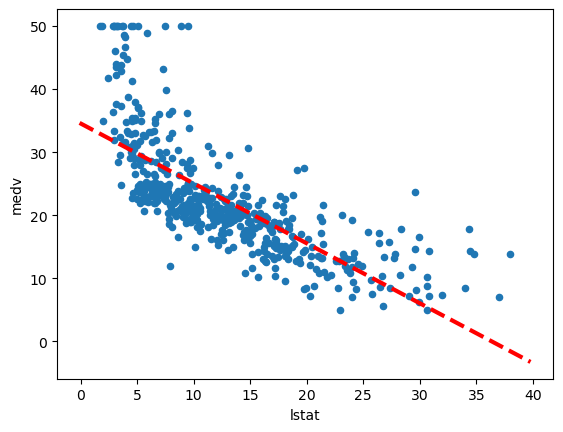

In [40]:
ax = Boston.plot.scatter("lstat", "medv")
# Adding regression line to a plot of medv vs lstat
abline(ax, results.params[0], results.params[1], "r--", linewidth=3)

In [45]:
results.fittedvalues, results.resid

(0      29.822595
 1      25.870390
 2      30.725142
 3      31.760696
 4      29.490078
          ...    
 501    25.366864
 502    25.927393
 503    29.195563
 504    28.397521
 505    27.067452
 Length: 506, dtype: float64,
 0      -5.822595
 1      -4.270390
 2       3.974858
 3       1.639304
 4       6.709922
          ...    
 501    -2.966864
 502    -5.327393
 503    -5.295563
 504    -6.397521
 505   -15.167452
 Length: 506, dtype: float64)

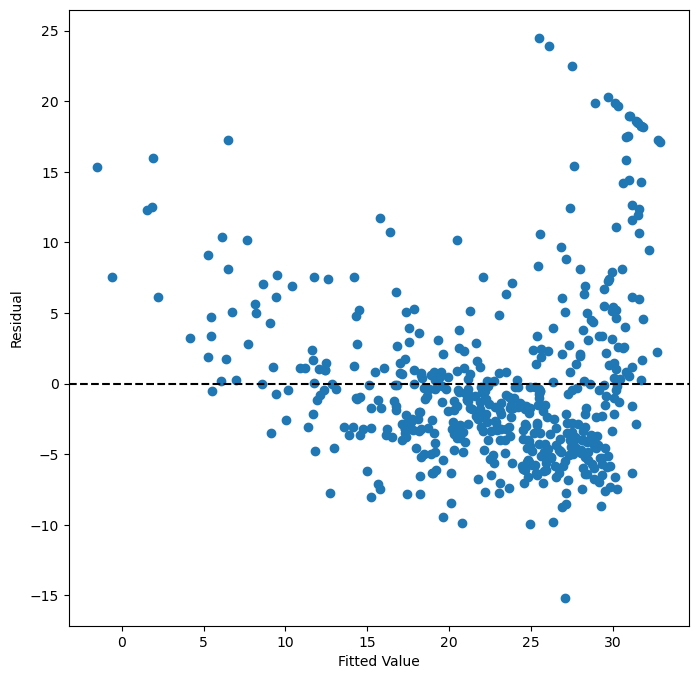

In [42]:
ax = plt.subplots(figsize=(8, 8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel("Fitted Value")
ax.set_ylabel("Residual")
ax.axhline(0, c="k", ls="--");

374

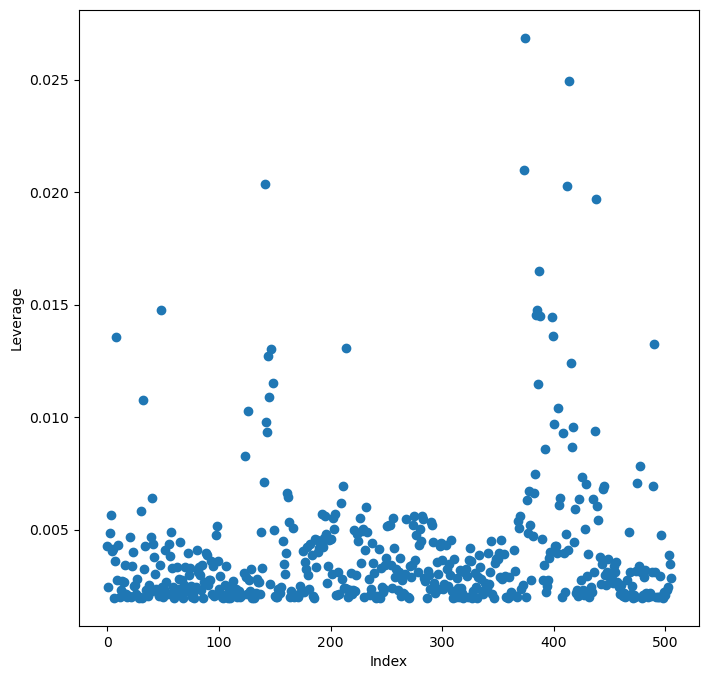

In [46]:
# leverage statistics can be computed for any no. of predictors using the
# hat_matrix_diag attribute of the value returned by the get_influence() method
infl = results.get_influence()
ax = plt.subplots(figsize=(8, 8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel("Index")
ax.set_ylabel("Leverage")
np.argmax(infl.hat_matrix_diag)

# 3.6.3 Multiple Linear Regression

In [64]:
X = MS(["lstat", "age"]).fit_transform(Boston)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [48]:
terms = Boston.columns.drop("medv")
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [49]:
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


In [53]:
minus_age = Boston.columns.drop(["medv", "age"])
Xma = MS(minus_age).fit_transform(Boston)
model1 = sm.OLS(y, Xma)
results1 = model1.fit()

In [51]:
dir(results)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 '

In [52]:
print(results.rsquared)
print(np.sqrt(results.scale))

0.7343070437613075
4.798034335596368


In [54]:
print(results1.rsquared)
print(np.sqrt(results1.scale))

0.7342674984601645
4.793532256301406


In [55]:
vals = [VIF(X, i) for i in range(1, X.shape[1])]
vif = pd.DataFrame({"vif":vals}, index=X.columns[1:])
vif

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


In [56]:
# or above can be constructed using
vals = []
for i in range(1, X.values.shape[1]):
    vals.append(VIF(X.values, i))
vals

[1.7674859154310127,
 2.2984589077358097,
 3.9871806307570976,
 1.071167773758404,
 4.369092622844795,
 1.9125324374368864,
 3.0882320397311975,
 3.954036641628298,
 7.445300760069838,
 9.002157663471797,
 1.7970595931297808,
 2.8707765008417514]

In [60]:
X.values # an array corresponsonding to dataframe

array([[1.0000e+00, 6.3200e-03, 1.8000e+01, ..., 2.9600e+02, 1.5300e+01,
        4.9800e+00],
       [1.0000e+00, 2.7310e-02, 0.0000e+00, ..., 2.4200e+02, 1.7800e+01,
        9.1400e+00],
       [1.0000e+00, 2.7290e-02, 0.0000e+00, ..., 2.4200e+02, 1.7800e+01,
        4.0300e+00],
       ...,
       [1.0000e+00, 6.0760e-02, 0.0000e+00, ..., 2.7300e+02, 2.1000e+01,
        5.6400e+00],
       [1.0000e+00, 1.0959e-01, 0.0000e+00, ..., 2.7300e+02, 2.1000e+01,
        6.4800e+00],
       [1.0000e+00, 4.7410e-02, 0.0000e+00, ..., 2.7300e+02, 2.1000e+01,
        7.8800e+00]])

# 3.6.5 Interaction terms

In [61]:
# to include interaction terms in a linear model using ModelSpec()
# just include a tuple ("lstat", "age") tells the model matrix builder to include
# an interaction term between lstat and age
X = MS(["lstat", "age", ("lstat", "age")]).fit_transform(Boston)
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


Interaction term's p value is somewhat significant

# 3.6.6 Non-Linear Transformations of the Predictors

In [62]:
X = MS([poly("lstat", degree=2), "age"]).fit_transform(Boston)
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


The effectively zero p-value associated with the quadratic terms(i.e third row above) suggests that it leads to an improved model.

In [65]:
anova_lm(results1, results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


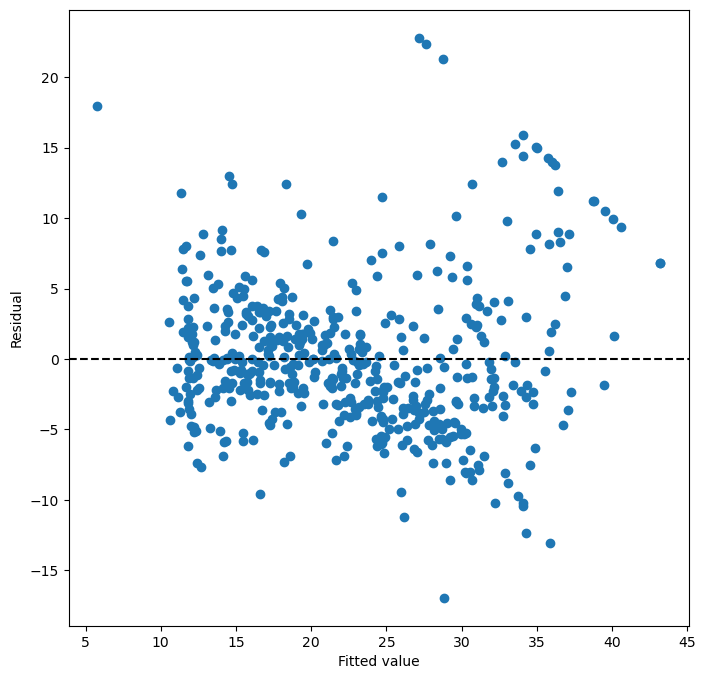

In [67]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(results3.fittedvalues, results3.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k',ls='--');

# 3.6.7 Qualitative Predictors

In [68]:
Carseats = load_data("Carseats")
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [69]:
allvars = list(Carseats.columns.drop("Sales"))
y = Carseats["Sales"]
final = allvars + [("Income", "Advertising"), ("Price", "Age")] # adding interaction terms

X = MS(final).fit_transform(Carseats)
model = sm.OLS(y, X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288
